Import libraries:

In [3]:
import pandas as pd
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import time

/Users/elenasm7/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Read in the data:

In [4]:
loc = '../../Mod_4/Mod_4_project/'
eth_1 = pd.read_csv(loc+'data/full_sets/ethical_brands_elena.csv')
eth_2 = pd.read_csv(loc+'data/full_sets/full_ethical_df_grace.csv')
uneth_1 = pd.read_csv(loc+'data/full_sets/full_unethical_df_grace.csv')
uneth_2 = pd.read_csv(loc+'data/full_sets/unethical_brands_elena.csv')

Drop old axes: 

In [7]:
eth_1.drop(['Unnamed: 0'],axis=1,inplace=True)
eth_2.drop(['Unnamed: 0'],axis=1,inplace=True)
uneth_1.drop(['Unnamed: 0'],axis=1,inplace=True)
uneth_2.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
full_df = pd.concat([eth_1,eth_2,uneth_1,uneth_2])
full_df.reset_index(drop=True,inplace=True)

In [13]:
full_df.isnull().sum()

brand             0
description       0
href           1280
img-file          0
is_ethical        0
link            149
price             0
dtype: int64

In [17]:
import os, shutil

In [18]:
backpacks_dir = '../data/backpacks/'
buckets_dir = '../data/buckets/'
circles_dir = '../data/circles/'
clutch_dir = '../data/clutch/'
fanny_packs_dir = '../data/fanny_packs/'
shoulder_bags_dir = '../data/shoulder_bags/'
totes_dir = '../data/totes/'
new_dir = '../split/'

In [20]:
imgs_backpacks = [file for file in os.listdir(backpacks_dir) if (file.endswith('.jpg')) or (file.endswith('.png'))]
imgs_buckets = [file for file in os.listdir(buckets_dir) if (file.endswith('.jpg')) or (file.endswith('.png'))]
imgs_circles = [file for file in os.listdir(circles_dir) if (file.endswith('.jpg')) or (file.endswith('.png'))]
imgs_clutch = [file for file in os.listdir(clutch_dir) if (file.endswith('.jpg')) or (file.endswith('.png'))]
imgs_fanny_packs = [file for file in os.listdir(fanny_packs_dir) if (file.endswith('.jpg')) or (file.endswith('.png'))]
imgs_shoulder_bags = [file for file in os.listdir(shoulder_bags_dir) if (file.endswith('.jpg')) or (file.endswith('.png'))]
imgs_totes = [file for file in os.listdir(totes_dir) if (file.endswith('.jpg')) or (file.endswith('.png'))]

In [22]:
os.mkdir(new_dir)

In [ ]:
train_folder = os.path.join(new_dir, 'train')
train_santa = os.path.join(train_folder, 'santa')
train_not_santa = os.path.join(train_folder, 'not_santa')
train_santa = os.path.join(train_folder, 'santa')
train_santa = os.path.join(train_folder, 'santa')
train_santa = os.path.join(train_folder, 'santa')
train_santa = os.path.join(train_folder, 'santa')
train_santa = os.path.join(train_folder, 'santa')


test_folder = os.path.join(new_dir, 'test')
test_santa = os.path.join(test_folder, 'santa')
test_not_santa = os.path.join(test_folder, 'not_santa')
test_santa = os.path.join(test_folder, 'santa')
test_santa = os.path.join(test_folder, 'santa')
test_santa = os.path.join(test_folder, 'santa')
test_santa = os.path.join(test_folder, 'santa')
test_santa = os.path.join(test_folder, 'santa')

In [51]:
import os
import random
from shutil import copyfile

def img_train_test_split(img_source_dir, train_size, random_seed):
    """
    Randomly splits images over a train and validation folder, while preserving the folder structure
    
    Parameters
    ----------
    img_source_dir : string
        Path to the folder with the images to be split. Can be absolute or relative path   
        
    train_size : float
        Proportion of the original images that need to be copied in the subdirectory in the train folder
    """    
    if not (isinstance(img_source_dir, str)):
        raise AttributeError('img_source_dir must be a string')
        
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exist')
        
    if not (isinstance(train_size, float)):
        raise AttributeError('train_size must be a float')
        
    # Set up empty folder structure if not exists
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        if not os.path.exists('data/train'):
            os.makedirs('data/train')
        if not os.path.exists('data/validation'):
            os.makedirs('data/validation')
            
    # Get the subdirectories in the main image folder
    subdirs = [subdir for subdir in os.listdir(img_source_dir) if os.path.isdir(os.path.join(img_source_dir, subdir))]

    for subdir in subdirs:
        subdir_fullpath = os.path.join(img_source_dir, subdir)
        if len(os.listdir(subdir_fullpath)) == 0:
            print(subdir_fullpath + ' is empty')
            break

        train_subdir = os.path.join('data/train', subdir)
        validation_subdir = os.path.join('data/validation', subdir)

        # Create subdirectories in train and validation folders
        if not os.path.exists(train_subdir):
            os.makedirs(train_subdir)

        if not os.path.exists(validation_subdir):
            os.makedirs(validation_subdir)

        train_counter = 0
        validation_counter = 0
        
        np.random.seed(random_seed)
        # Randomly assign an image to train or validation folder
        for filename in os.listdir(subdir_fullpath):
            if filename.endswith(".jpg") or filename.endswith(".png"): 
                fileparts = filename.split('.')

                if random.uniform(0, 1) <= train_size:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir, fileparts[0] + '.' + fileparts[1]))
                    train_counter += 1
                else:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir, fileparts[0] + '.' + fileparts[1]))
                    validation_counter += 1
                    
        print('Copied ' + str(train_counter) + ' images to data/train/' + subdir)
        print('Copied ' + str(validation_counter) + ' images to data/validation/' + subdir)

In [47]:
subdirs = [subdir for subdir in os.listdir('../data_2') if os.path.isdir(os.path.join('../data_2', subdir))]

In [48]:
subdirs

['buckets',
 'fanny_packs',
 'circles',
 'shoulder_bags',
 'totes',
 'backpacks',
 'clutch']

In [52]:
# https://gist.github.com/bertcarremans/679624f369ed9270472e37f8333244f5
img_train_test_split('../data_2', 0.8, 42)

Copied 88 images to data/train/buckets
Copied 15 images to data/validation/buckets
Copied 87 images to data/train/fanny_packs
Copied 20 images to data/validation/fanny_packs
Copied 64 images to data/train/circles
Copied 17 images to data/validation/circles
Copied 405 images to data/train/shoulder_bags
Copied 96 images to data/validation/shoulder_bags
Copied 386 images to data/train/totes
Copied 104 images to data/validation/totes
Copied 397 images to data/train/backpacks
Copied 87 images to data/validation/backpacks
Copied 76 images to data/train/clutch
Copied 17 images to data/validation/clutch


### Import the model from Keras: 

In [54]:
from keras.applications import ResNet50
#Load the VGG model
ResNet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.


/Users/elenasm7/anaconda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 33s 0us/step


In [55]:
ResNet50.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
add_9 (Add)                     (None, 14, 14, 1024) 0           bn4b_branch2c[0][0]              
                                                                 activation_25[0][0]              
__________________________________________________________________________________________________
activation_28 (Activation)      (None, 14, 14, 1024) 0           add_9[0][0]                      
__________________________________________________________________________________________________
res4c_branch2a (Conv2D)         (None, 14, 14, 256)  262400      activation_28[0][0]              
__________________________________________________________________________________________________
bn4c_branch2a (BatchNormalizati (None, 14, 14, 256)  1024        res4c_branch2a[0][0]             
__________________________________________________________________________________________________
activation

### Freeze Layers
After doing some research, I decided to freeze all of the layers of the pretrained model before adding on any more layers. So, this is what I do in the next cell. If you look at the output all cannot be trained:

In [59]:
# Freeze the layers except the last 4 layers
for layer in ResNet50.layers:
    layer.trainable = False

#Check the trainable status of the individual layers
for layer in ResNet50.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x1a3b6c7f98> False
<keras.layers.convolutional.ZeroPadding2D object at 0x1a3b69b588> False
<keras.layers.convolutional.Conv2D object at 0x1a3b69b2b0> False
<keras.layers.normalization.BatchNormalization object at 0x1a3b69b828> False
<keras.layers.core.Activation object at 0x1a3b69b9e8> False
<keras.layers.convolutional.ZeroPadding2D object at 0x1a3b707278> False
<keras.layers.pooling.MaxPooling2D object at 0x1a3b71d4e0> False
<keras.layers.convolutional.Conv2D object at 0x1a3b6e3278> False
<keras.layers.normalization.BatchNormalization object at 0x1a3b8fb048> False
<keras.layers.core.Activation object at 0x1a3b8fba20> False
<keras.layers.convolutional.Conv2D object at 0x1a3b915f60> False
<keras.layers.normalization.BatchNormalization object at 0x1a3b981550> False
<keras.layers.core.Activation object at 0x1a3b9b8518> False
<keras.layers.convolutional.Conv2D object at 0x1a3ba30f28> False
<keras.layers.convolutional.Conv2D object at 0x1a3ba8

### Create a new model:
Below we are adding two fully connected layers to the ResNet50 layers we froze in the last part. At the end we also add a softmax activation layer. For this layer we specified 7, becuase that is that number of categories we will be classifying: backpacks, buckets, circles, clutches, fanny packs, shoulder bags, an totes. 

In [62]:
from keras import models
from keras import layers
from keras import optimizers
 
#Create the model
model = models.Sequential()
 
#Add the vgg convolutional base model
model.add(ResNet50)
 
#Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))
 
#Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_4 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              102761472 
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 7175      
Total para

### Data Generators:

Create the data generators using keras' ImageDataGenerator. We will use the training and validation directories we created earlier to do this.

In [64]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        '../data/train',
        target_size=(224, 224),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        '../data/validation',
        target_size=(224, 224),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 1503 images belonging to 7 classes.
Found 356 images belonging to 7 classes.


### Train:

Now that we have everything in place we can train our new model. So, below we will do this now by first complining our new model, fitting it on our training data, and then saving it.

In [65]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
16/15 [===============================] - 636s 40s/step - loss: 5.8486 - acc: 0.3992 - val_loss: 1.9760 - val_acc: 0.2697
Epoch 2/30
16/15 [===============================] - 470s 29s/step - loss: 2.4069 - acc: 0.5222 - val_loss: 1.9184 - val_acc: 0.2921
Epoch 3/30
16/15 [===============================] - 428s 27s/step - loss: 1.9482 - acc: 0.5761 - val_loss: 2.0755 - val_acc: 0.0506
Epoch 4/30
16/15 [===============================] - 427s 27s/step - loss: 1.5124 - acc: 0.6027 - val_loss: 1.9163 - val_acc: 0.2669
Epoch 5/30
16/15 [===============================] - 483s 30s/step - loss: 1.2404 - acc: 0.6491 - val_loss: 1.9841 - val_acc: 0.1039
Epoch 6/30
16/15 [===============================] - 453s 28s/step - loss: 1.1862 - acc: 0.6547 - val_loss: 1.9637 - val_acc: 0.1320
Epoch 7/30
16/15 [===============================] - 435s 27s/step - loss: 1.2362 - acc: 0.6424 - val_loss: 1.8329 - val_acc: 0.2893
Epoch 8/30
16/15 [===

### Check Preformance:

Let us check how well this model preformed. We will displaying a few graphs below:

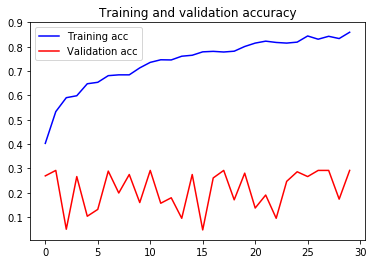

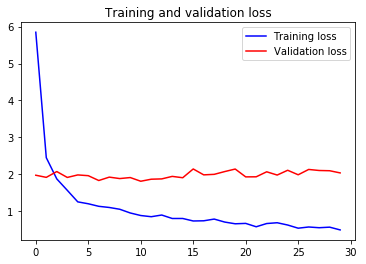

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### Model 2:

It looks like our model overfit on our training data, so we will try to help with this. One resource I found suggested getting rid of some of the Dense fully connected layers, using data augmentation, and including more drop layers. So, we will try these below.

In [67]:
from keras import models
from keras import layers
from keras import optimizers
 
#Create the model
model_2 = models.Sequential()
 
#Add the vgg convolutional base model
model_2.add(ResNet50)
 
#Add new layers
model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(1024, activation='relu'))
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(7, activation='softmax'))
 
#Show a summary of the model. Check the number of trainable parameters
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_5 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              102761472 
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 7175      
Total params: 126,356,359
Trainable params: 102,768,647
Non-trainable params: 23,587,712
_____________________________________________________

### New Data Generators:

In [68]:
train_datagen_2 = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.15,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
 
validation_datagen_2 = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator_2 = train_datagen_2.flow_from_directory(
    '../data/train',
    target_size=(224, 224),
    batch_size=train_batchsize,
    class_mode='categorical')
 
validation_generator_2 = validation_datagen_2.flow_from_directory(
    '../data/validation',
    target_size=(224, 224),
    batch_size=val_batchsize,
    class_mode='categorical',
    shuffle=False)

Found 1503 images belonging to 7 classes.
Found 356 images belonging to 7 classes.


### Train New Model

In [69]:
# Compile the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history_2 = model_2.fit_generator(
      train_generator_2,
      steps_per_epoch=train_generator_2.samples/train_generator_2.batch_size ,
      epochs=30,
      validation_data=validation_generator_2,
      validation_steps=validation_generator_2.samples/validation_generator_2.batch_size,
      verbose=1)
 
# Save the model
model_2.save('../model_2.h5')

Epoch 1/30
16/15 [===============================] - 565s 35s/step - loss: 8.2027 - acc: 0.3996 - val_loss: 7.3175 - val_acc: 0.2921
Epoch 2/30
16/15 [===============================] - 454s 28s/step - loss: 7.6597 - acc: 0.4751 - val_loss: 6.4745 - val_acc: 0.2921
Epoch 3/30
16/15 [===============================] - 456s 28s/step - loss: 5.6291 - acc: 0.5732 - val_loss: 6.1234 - val_acc: 0.2697
Epoch 4/30
16/15 [===============================] - 448s 28s/step - loss: 4.2758 - acc: 0.5985 - val_loss: 3.7272 - val_acc: 0.3315
Epoch 5/30
16/15 [===============================] - 451s 28s/step - loss: 3.7855 - acc: 0.6267 - val_loss: 3.5048 - val_acc: 0.2753
Epoch 6/30
16/15 [===============================] - 440s 28s/step - loss: 2.8048 - acc: 0.7033 - val_loss: 3.2595 - val_acc: 0.2921
Epoch 7/30
16/15 [===============================] - 450s 28s/step - loss: 2.5342 - acc: 0.6543 - val_loss: 2.7429 - val_acc: 0.2921
Epoch 8/30
16/15 [===============================] - 443s 28s/step - 

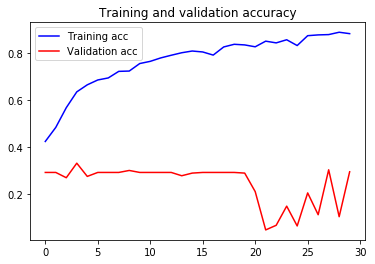

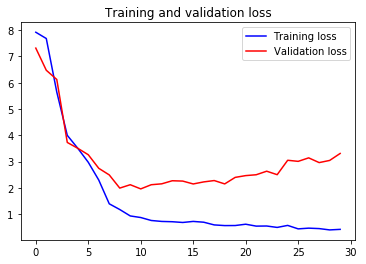

In [76]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

### Model 3:


In [78]:
#Create the model
model_3 = models.Sequential()
 
#Add the vgg convolutional base model
model_3.add(ResNet50)
 
#Add new layers
model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(14, activation='relu'))
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(7, activation='softmax'))
 
#Show a summary of the model. Check the number of trainable parameters
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_7 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 100352)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 14)                1404942   
_________________________________________________________________
dropout_11 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 105       
Total params: 24,992,759
Trainable params: 1,405,047
Non-trainable params: 23,587,712
________________________________________________________

### New Data Generators 3:

In [79]:
train_datagen_3 = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.15,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
 
validation_datagen_3 = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator_3 = train_datagen_3.flow_from_directory(
    '../data/train',
    target_size=(224, 224),
    batch_size=train_batchsize,
    class_mode='categorical')
 
validation_generator_3 = validation_datagen_3.flow_from_directory(
    '../data/validation',
    target_size=(224, 224),
    batch_size=val_batchsize,
    class_mode='categorical',
    shuffle=False)

Found 1503 images belonging to 7 classes.
Found 356 images belonging to 7 classes.


### Train Model 3:

In [80]:
# Compile the model
model_3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history_3 = model_3.fit_generator(
      train_generator_3,
      steps_per_epoch=train_generator_3.samples/train_generator_3.batch_size ,
      epochs=20,
      validation_data=validation_generator_3,
      validation_steps=validation_generator_3.samples/validation_generator_3.batch_size,
      verbose=1)
 
# Save the model
model_3.save('../model_3.h5')

Epoch 1/20
16/15 [===============================] - 463s 29s/step - loss: 2.1050 - acc: 0.2764 - val_loss: 1.8526 - val_acc: 0.2865
Epoch 2/20
16/15 [===============================] - 376s 24s/step - loss: 1.7788 - acc: 0.2817 - val_loss: 1.8248 - val_acc: 0.2921
Epoch 3/20
16/15 [===============================] - 379s 24s/step - loss: 1.6579 - acc: 0.3760 - val_loss: 1.9102 - val_acc: 0.2781
Epoch 4/20
16/15 [===============================] - 378s 24s/step - loss: 1.6720 - acc: 0.4005 - val_loss: 1.8450 - val_acc: 0.2921
Epoch 5/20
16/15 [===============================] - 377s 24s/step - loss: 1.6722 - acc: 0.3911 - val_loss: 1.9153 - val_acc: 0.2275
Epoch 6/20
16/15 [===============================] - 376s 24s/step - loss: 1.6524 - acc: 0.3714 - val_loss: 1.9263 - val_acc: 0.1461
Epoch 7/20
16/15 [===============================] - 376s 23s/step - loss: 1.5915 - acc: 0.3967 - val_loss: 1.9058 - val_acc: 0.2809
Epoch 8/20
16/15 [===============================] - 384s 24s/step - 

### Next Steps:
Due to these resutls, I believe the best way to improve these results is simply to scrape more bags from different shops online.